In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [11]:
dataset = pd.read_csv('Mall_Customers.csv')


In [12]:
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df_cleaned = dataset.drop(columns=["CustomerID", "Genre"])
X = df_cleaned.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


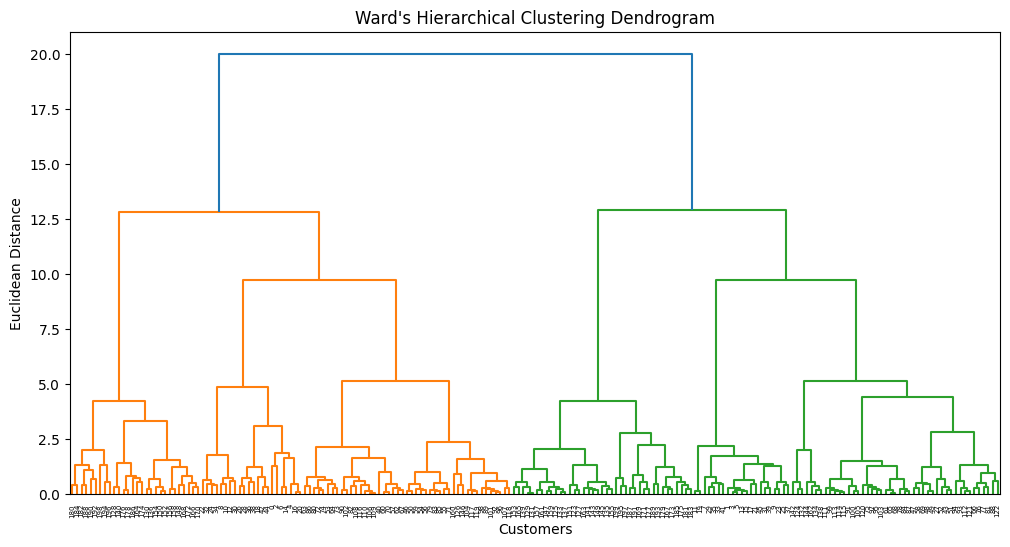

In [14]:
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Ward's Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [15]:
dataset['Cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')


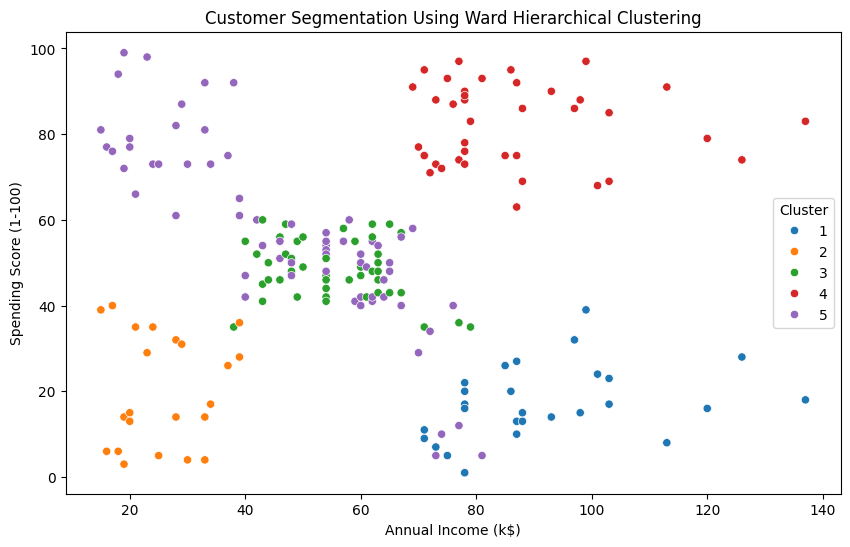

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Annual Income (k$)'], y=dataset['Spending Score (1-100)'], hue=dataset['Cluster'], palette='tab10')
plt.title("Customer Segmentation Using Ward Hierarchical Clustering")
plt.show()


In [17]:
dataset['Cluster'].value_counts()


Cluster
5    66
3    45
4    39
1    28
2    22
Name: count, dtype: int64